In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz


1. train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
2. test - Test set. 1 day of ads to for testing your model predictions. 
3. sampleSubmission.csv - Sample submission file in the correct format, corresponds to the All-0.5 Benchmark.

# Data fields
1. id: ad identifier- **4577464** unqiue values
2. click: 0/1 for non-click/click-  **[0,1]** binary values
3. hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC - **29** unqiue hours
4. C1 -- anonymized categorical variable - **7** categorical values,
5. banner_pos- **7** unique positions, these are **ordinal**. It is acceptable as position is ordinal
6. site_id- **2962** unique id's
7. site_domain- **3542** unqiue values
8. site_category- **22** unique values
9. app_id- **4333** unique values
10. app_domain- **304** unique values
11. app_category- **31** unqiue values
12. device_id- **408547** unique values
13. device_ip- **1189783** unique values
14. device_model- **6195** unique values
15. device_type- **4** unique values, these are **ordinal**, It is acceptable as device compute/size can be ordinal
16. device_conn_type- **4** unique values, these are **ordinal**, It is acceptable as device connection can be slow and fast i.e ordinal.
17. C14-C21 -- anonymized categorical variables
- these all are **ordinal**
- C14 - (792,)
- C15 - (8,)
- C16 - (9,)
- C17 - (194,)
- C18 - (4,)
- C19 - (45,)
- C20 - (168,)
- C21 - (38,)


In [2]:
trainDf = pd.read_csv('/kaggle/input/avazu-ctr-prediction/train.gz',compression='gzip', nrows =4577464, header=0, sep=',', quotechar='"')
testDf = pd.read_csv('/kaggle/input/avazu-ctr-prediction/test.gz',compression='gzip', nrows =4577464, header=0, sep=',', quotechar='"')


In [3]:
trainDf.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [4]:
testDf.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [5]:
trainDf.shape,testDf.shape

((4577464, 24), (4577464, 23))

In [6]:
trainDf.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [7]:
# trainDf['id'].unique().shape
for i in [14,15,16,17,18,19,20,21]:
    print("C{} -".format(i),trainDf['C{}'.format(i)].unique().shape)

C14 - (792,)
C15 - (8,)
C16 - (9,)
C17 - (194,)
C18 - (4,)
C19 - (45,)
C20 - (168,)
C21 - (38,)


In [8]:
for i in range(trainDf.columns.shape[0]):
    print(trainDf.columns[i],trainDf[trainDf.columns[i]].unique(),trainDf[trainDf.columns[i]].unique().shape)

id [1.00000942e+18 1.00001693e+19 1.00003719e+19 ... 1.29784644e+19
 1.29785385e+19 1.29787257e+19] (4577464,)
click [0 1] (2,)
hour [14102100 14102101 14102102 14102103 14102104 14102105 14102106 14102107
 14102108 14102109 14102110 14102111 14102112 14102113 14102114 14102115
 14102116 14102117 14102118 14102119 14102120 14102121 14102122 14102123
 14102200 14102201 14102202 14102203 14102204] (29,)
C1 [1005 1002 1010 1001 1007 1008 1012] (7,)
banner_pos [0 1 4 5 2 7 3] (7,)
site_id ['1fbe01fe' 'fe8cc448' 'd6137915' ... '54114ceb' '871fcef6' 'b9d6a79c'] (2962,)
site_domain ['f3845767' '9166c161' 'bb1ef334' ... '5b9c601f' 'cea52464' '95e38526'] (3542,)
site_category ['28905ebd' '0569f928' 'f028772b' '50e219e0' '3e814130' '76b2941d'
 'f66779e6' '335d28a8' '72722551' '75fa27f6' '110ab22d' 'c0dd3be3'
 'bcf865d9' 'a818d37a' '42a36e14' 'e787de0e' '5378d028' '9ccfa2ea'
 '70fb0e29' 'dedf689d' '8fd0aea4' '74073276'] (22,)
app_id ['ecad2386' '98fed791' '66a5f0f3' ... '2af55002' '0fde8ffe' '66b

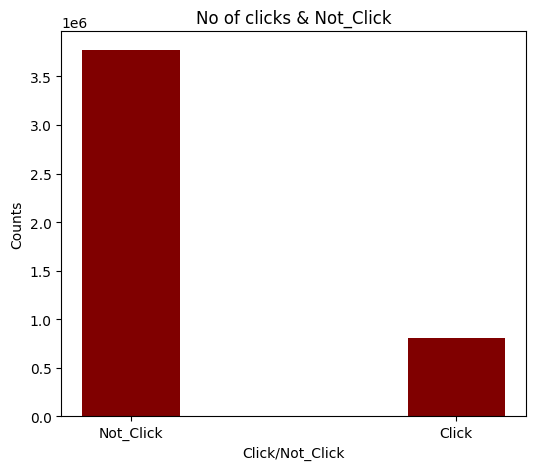

In [9]:
dix={"Not_Click":trainDf['click'].value_counts()[0],"Click":trainDf['click'].value_counts()[1]}
fig = plt.figure(figsize = (6, 5))
 
# creating the bar plot
plt.bar(dix.keys(), dix.values(), color ='maroon',
        width = 0.3)
 
plt.xlabel("Click/Not_Click")
plt.ylabel("Counts")
plt.title("No of clicks & Not_Click")
plt.show()




In [10]:
trainDf

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577459,1.297819e+19,0,14102204,1005,1,f42b9119,9179db90,3e814130,ecad2386,7801e8d9,...,1,0,20352,320,50,2333,0,39,-1,157
4577460,1.297826e+19,1,14102204,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17037,320,50,1934,2,39,-1,16
4577461,1.297846e+19,0,14102204,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,...,1,0,1037,320,50,178,3,1327,100148,15
4577462,1.297854e+19,0,14102204,1002,0,9e8e8d09,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,5299,320,50,479,3,39,100081,23


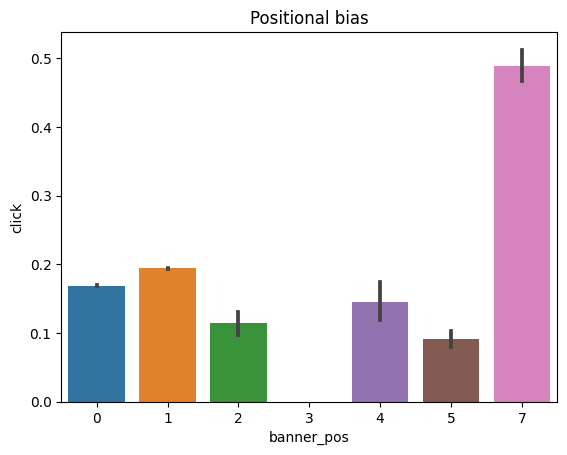

In [11]:
sns.barplot(data=trainDf,y="click",x="banner_pos")
plt.title("Positional bias")
plt.show()

**Position bias is there as user is more likely clicking on items which are positioned on top**

In [12]:
grouped = trainDf.groupby(['banner_pos', 'click'])['click'].count()
grouped

banner_pos  click
0           0        2833155
            1         576007
1           0         935989
            1         225857
2           0           1293
            1            166
3           0             21
4           0            510
            1             87
5           0           2439
            1            243
7           0            867
            1            830
Name: click, dtype: int64

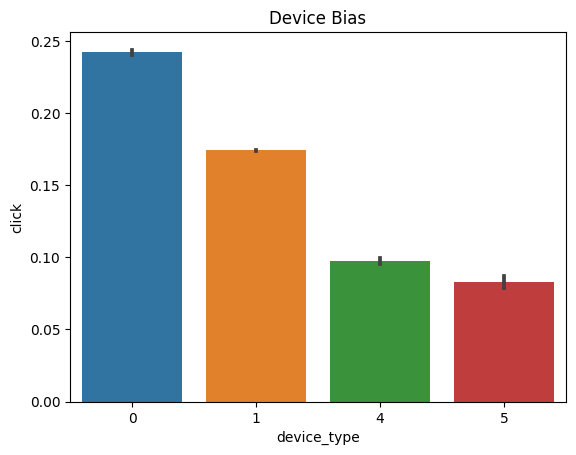

In [13]:
sns.barplot(data=trainDf,y="click",x="device_type")
plt.title("Device Bias")
plt.show()

1. The size of device also affects click rate.
2. The computation each device has also affects the click
- **So clearly there is device bias too**

In [14]:
grouped = trainDf.groupby(['device_type', 'click'])['click'].count()
grouped

device_type  click
0            0         162252
             1          51837
1            0        3511317
             1         740708
4            0          87214
             1           9428
5            0          13491
             1           1217
Name: click, dtype: int64

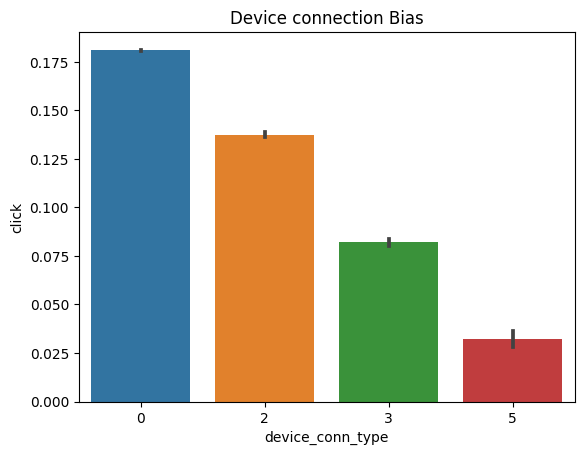

In [15]:
sns.barplot(data=trainDf,y="click",x="device_conn_type")
plt.title("Device connection Bias")
plt.show()

1. Speed of connection also affects the loading speed hence affecting the click probability.
- **Hence there is connection bias too**

In [16]:
grouped = trainDf.groupby(['device_conn_type', 'click'])['click'].count()
grouped

device_conn_type  click
0                 0        3385673
                  1         747438
2                 0         306341
                  1          48786
3                 0          75565
                  1           6744
5                 0           6695
                  1            222
Name: click, dtype: int64